<a href="https://colab.research.google.com/github/fahadkh2019/UTS_ML_2019_ID12643324/blob/master/Assignment2-Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration


In [0]:
#import dataset from github account
train_url = 'https://raw.githubusercontent.com/fahadkh2019/UTS_ML_2019_ID12643324/master/dataset/train.csv'
test_url = 'https://raw.githubusercontent.com/fahadkh2019/UTS_ML_2019_ID12643324/master/dataset/test.csv'

**Importing Libraries**


In [0]:
# To store data
import pandas as pd

# To do linear algebra
import numpy as np
from numpy import pi

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To get new datatypes and functions
from collections import Counter
from cycler import cycler

# To investigate distributions
from scipy.stats import norm, skew, probplot
from scipy.optimize import curve_fit

# To build models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# To gbm light
from lightgbm import LGBMClassifier

# To measure time
from time import time

In [0]:
#import dataset from github account
train_url = 'https://raw.githubusercontent.com/fahadkh2019/UTS_ML_2019_ID12643324/master/dataset/train.csv'
test_url = 'https://raw.githubusercontent.com/fahadkh2019/UTS_ML_2019_ID12643324/master/dataset/test.csv'
train_data = pd.read_csv(train_url)
test_data  = pd.read_csv(test_url)
# Combine boths dataframes
train_data['Data'] = 'Train'
test_data['Data'] = 'Test'
both_data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
both_data['subject'] = '#' + both_data['subject'].astype(str)

# Create label
label = both_data.pop('Activity')

print('Train:\t{}'.format(train_data.shape))
print('Test:\t{}\n'.format(test_data.shape))

train_data.head()

Train:	(7352, 564)
Test:	(2947, 564)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Data
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,

In [0]:
# Get null values and dataframe information
both_data.info()
print('Null Values In Data: {}\n'.format(both_data.isna().sum().sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Data
dtypes: float64(561), object(2)
memory usage: 44.2+ MB
Null Values In Data: 0



NameError: ignored

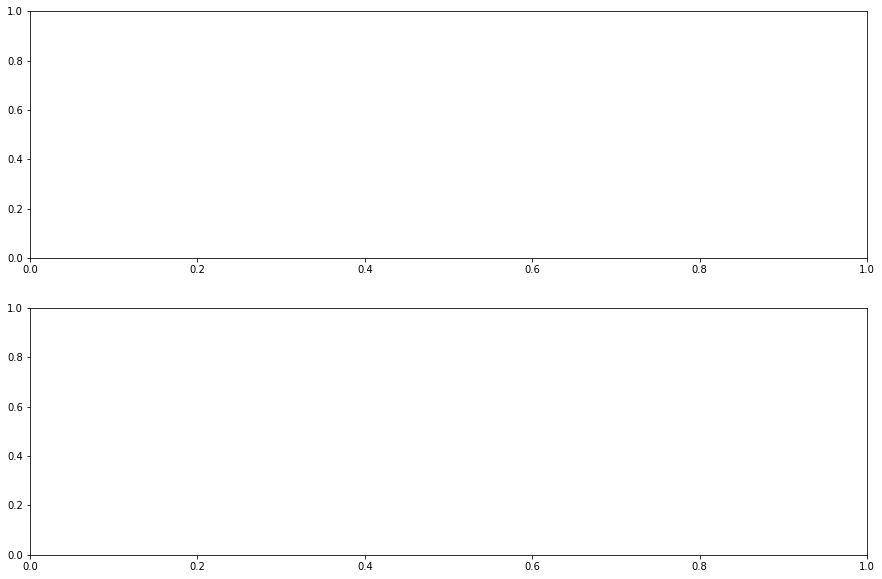

In [0]:
# Create datasets
tsne_data = both_data.copy()
data_data = tsne_data.pop('Data')
subject_data = tsne_data.pop('subject')

# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)


# Create subplots
fig, axarr = plt.subplots(2, 1, figsize=(15,10))

### Plot Activities
# Get colors
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    axarr[0].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
axarr[0].set_title('Activity Visualisation')
axarr[0].legend()


### Plot Subjects
# Get colors
n = subject_data.unique().shape[0]
colormap = get_cmap('gist_ncar')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each participant
for i, group in enumerate(subject_data.unique()):
    # Mask to separate sets
    mask = (subject_data==group).values
    axarr[1].scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)

axarr[1].set_title('Participant Visualisation')
plt.show()

In [0]:
# Store the data
data = []
# Iterate over each activity
for activity in label_counts.index:
    # Create dataset
    act_data = both_data[label==activity].copy()
    act_data_data = act_data.pop('Data')
    act_subject_data = act_data.pop('subject')
    
    # Scale data
    scl = StandardScaler()
    act_data = scl.fit_transform(act_data)

    # Reduce dimensions
    pca = PCA(n_components=0.9, random_state=3)
    act_data = pca.fit_transform(act_data)

    
    # Split training testing data
    enc = LabelEncoder()
    label_encoded = enc.fit_transform(act_subject_data)
    X_train, X_test, y_train, y_test = train_test_split(act_data, label_encoded, random_state=3)


    # Fit basic model
    print('Activity: {}'.format(activity))
    lgbm = LGBMClassifier(n_estimators=500, random_state=3)
    lgbm = lgbm.fit(X_train, y_train)
    
    score = accuracy_score(y_true=y_test, y_pred=lgbm.predict(X_test))
    print('Accuracy on testset:\t{:.4f}\n'.format(score))
    data.append([activity, score])

In [0]:
# Create duration dataframe
duration_df = (both_data.groupby([label, subject_data])['Data'].count().reset_index().groupby('Activity').agg({'Data':'mean'}) * 1.28).rename(columns={'Data':'Time taken in Seconds'})
activity_df = pd.DataFrame(data, columns=['Activity', 'Accuracy']).set_index('Activity')
activity_df.join(duration_df)

In [0]:
# Group the data by participant and compute total duration of staircase walking
mask = label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])
duration_df = (both_data[mask].groupby([label[mask], 'subject'])['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)
plot_data['Stair Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data', hue='Activity')
plt.title('Participants Compared By Their Staircase Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration')
plt.show()

In [0]:
# Group the data by participant and compute total duration of walking
mask = label=='WALKING'
duration_df = (both_data[mask].groupby('subject')['Data'].count() * 1.28)

# Create plot
plot_data = duration_df.reset_index().sort_values('Data', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=plot_data, x='subject', y='Data')
plt.title('Participants Compared By Their Walking Duration')
plt.xlabel('Participants')
plt.ylabel('Total Duration [s]')
plt.show()

# Methodology

In [0]:
# import data separately

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)


In [0]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

#tree-based feature selection

features = train.iloc[:,0:562]
label = train['Activity']
clf = ExtraTreesClassifier()
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(features)
print(New_features.shape)


In [0]:
from sklearn.svm import LinearSVC
#L1 based feature selection
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
New_features_2 = model_2.transform(features)
print(New_features_2.shape)

In [0]:
#Classifier Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
import timeit

#import evaluation metrics and packages


test_features= test.iloc[:,0:562]
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]
Confusion_matrix_1=[]

#run each classifier without feature selection
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(test['Activity'],pred))
    Confusion_matrix_1.append(confusion_matrix(test['Activity'], pred, labels=["LAYING","STANDING","SITTING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS","WALKING"]))

In [0]:
# run each classifier with tree-based feature selection
test_features= model.transform(test.iloc[:,0:562])
Time_2=[]
Model_2=[]
Out_Accuracy_2=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(test['Activity'],pred))

In [0]:
#run each classifier with L1 feature selection
test_features= model_2.transform(test.iloc[:,0:562])
Time_3=[]
Model_3=[]
Out_Accuracy_3=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(New_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(test['Activity'],pred))

# Evaluation

In [0]:

%matplotlib inline
ind =  np.arange(4)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
plt.show()

In [0]:

%matplotlib inline
ind =  np.arange(4)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Time_1, width, color='r')
rects2 = ax.bar(ind + width, Time_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Time_3, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))

plt.show()

In [0]:
import seaborn as sns

#CM for Decision Tree
ax= plt.subplot()
sns.heatmap(Confusion_matrix_1[0], annot=True, ax = ax,fmt='d')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree') 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])


In [0]:
#CM for RF
ax= plt.subplot()
sns.heatmap(Confusion_matrix_1[1], annot=True, ax = ax,fmt='d')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest') 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])


In [0]:
#CM for KNN
ax= plt.subplot()
sns.heatmap(Confusion_matrix_1[2], annot=True, ax = ax,fmt='d')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for KNN') 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])


In [0]:
#CM for SVM

ax= plt.subplot()
sns.heatmap(Confusion_matrix_1[3], annot=True, ax = ax,fmt='d')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for SVM') 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])
